In [1]:
import pickle
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer
# import torch
import numpy as np
from datetime import datetime, timedelta
import yfinance as yf
from Backtester_FO import YFCrossSectionalBT
# from yf_backtester import YFCrossSectionalBT

In [2]:
data = pd.read_pickle("finBERT_S&P.pkl")

,companyid,CIK,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,companyname,mostimportantdateutc,word_counts,content,sentiment,sentiment_score,negative_prob,neutral_prob,positive_prob
0,100231,0000732717,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",AT&T Inc.,2006-01-26,8416.0,"Good morning, ladies and gentlemen, and welcom...",positive,0.939536,0.041608,0.018855,0.939536
1,100231,0000732717,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",AT&T Inc.,2006-04-25,8143.0,"Good morning, ladies and gentlemen, and welcom...",positive,0.939940,0.039617,0.020444,0.939940
2,100231,0000732717,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",AT&T Inc.,2006-10-23,9886.0,Good morning ladies and gentlemen and welcome...,positive,0.936125,0.029380,0.034495,0.936125
3,972190,0001467373,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",Accenture plc,2006-12-20,5745.0,Ladies and gentleman thank you for standing by...,positive,0.939088,0.034818,0.026094,0.939088
4,24321,0000796343,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",Adobe Inc.,2006-03-22,9196.0,Good afternoon. My name is Ian and I’ll be you...,positive,0.945004,0.026455,0.028541,0.945004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,315476,0000109380,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah","Zions Bancorporation, National Association",2023-04-19,19593.0,"Greetings, and welcome to Zions Bancorp Q1 Ear...",positive,0.931767,0.047358,0.020875,0.931767
967,215548781,0001555280,ZTS,Zoetis,Health Care,Pharmaceuticals,"Parsippany, New Jersey",Zoetis Inc.,2023-02-14,20038.0,Welcome to the Fourth Quarter and Full Year 20...,positive,0.911656,0.070665,0.017678,0.911656
968,215548781,0001555280,ZTS,Zoetis,Health Care,Pharmaceuticals,"Parsippany, New Jersey",Zoetis Inc.,2023-05-04,17516.0,Welcome to the First Quarter 2023 Financial Re...,positive,0.914297,0.066364,0.019339,0.914297
969,27862,0001065088,EBAY,eBay,Consumer Discretionary,Internet & Direct Marketing Retail,"San Jose, California",eBay Inc.,2023-02-22,18495.0,"Ladies and gentlemen, thank you for standing b...",positive,0.861391,0.124174,0.014436,0.861391


In [3]:
data = data[data["sentiment"] != "neutral"]

In [4]:
data.reset_index(drop = True, inplace = True)
data.insert(2, "year", pd.to_datetime(data["mostimportantdateutc"]).dt.year)
data = data.replace('BF.B', 'BF-B')

In [5]:
data["mostimportantdateutc"] = pd.to_datetime(data["mostimportantdateutc"])
data["pos_neg_diff"] = data["positive_prob"] - data["negative_prob"]
data['Direction'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else -1)

In [6]:
tuned_data = data[data["pos_neg_diff"] >= data["pos_neg_diff"].describe().loc["25%"]]
tuned_data = tuned_data.reset_index(drop = True)
tuned_data

,companyid,CIK,year,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,companyname,mostimportantdateutc,word_counts,content,sentiment,sentiment_score,negative_prob,neutral_prob,positive_prob,pos_neg_diff,Direction
0,100231,0000732717,2006,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",AT&T Inc.,2006-01-26,8416.0,"Good morning, ladies and gentlemen, and welcom...",positive,0.939536,0.041608,0.018855,0.939536,0.897928,1
1,100231,0000732717,2006,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",AT&T Inc.,2006-04-25,8143.0,"Good morning, ladies and gentlemen, and welcom...",positive,0.939940,0.039617,0.020444,0.939940,0.900323,1
2,100231,0000732717,2006,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",AT&T Inc.,2006-10-23,9886.0,Good morning ladies and gentlemen and welcome...,positive,0.936125,0.029380,0.034495,0.936125,0.906745,1
3,972190,0001467373,2006,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",Accenture plc,2006-12-20,5745.0,Ladies and gentleman thank you for standing by...,positive,0.939088,0.034818,0.026094,0.939088,0.904269,1
4,24321,0000796343,2006,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",Adobe Inc.,2006-03-22,9196.0,Good afternoon. My name is Ian and I’ll be you...,positive,0.945004,0.026455,0.028541,0.945004,0.918549,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21149,315476,0000109380,2023,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah","Zions Bancorporation, National Association",2023-04-19,19593.0,"Greetings, and welcome to Zions Bancorp Q1 Ear...",positive,0.931767,0.047358,0.020875,0.931767,0.884409,1
21150,215548781,0001555280,2023,ZTS,Zoetis,Health Care,Pharmaceuticals,"Parsippany, New Jersey",Zoetis Inc.,2023-02-14,20038.0,Welcome to the Fourth Quarter and Full Year 20...,positive,0.911656,0.070665,0.017678,0.911656,0.840991,1
21151,215548781,0001555280,2023,ZTS,Zoetis,Health Care,Pharmaceuticals,"Parsippany, New Jersey",Zoetis Inc.,2023-05-04,17516.0,Welcome to the First Quarter 2023 Financial Re...,positive,0.914297,0.066364,0.019339,0.914297,0.847933,1
21152,27862,0001065088,2023,EBAY,eBay,Consumer Discretionary,Internet & Direct Marketing Retail,"San Jose, California",eBay Inc.,2023-02-22,18495.0,"Ladies and gentlemen, thank you for standing b...",positive,0.861391,0.124174,0.014436,0.861391,0.737217,1


In [7]:
tuned_data2 = data[data["pos_neg_diff"] >= data["pos_neg_diff"].describe().loc["50%"]]
tuned_data2 = tuned_data2.reset_index(drop = True)
tuned_data2

,companyid,CIK,year,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,companyname,mostimportantdateutc,word_counts,content,sentiment,sentiment_score,negative_prob,neutral_prob,positive_prob,pos_neg_diff,Direction
0,100231,0000732717,2006,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",AT&T Inc.,2006-01-26,8416.0,"Good morning, ladies and gentlemen, and welcom...",positive,0.939536,0.041608,0.018855,0.939536,0.897928,1
1,100231,0000732717,2006,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",AT&T Inc.,2006-04-25,8143.0,"Good morning, ladies and gentlemen, and welcom...",positive,0.939940,0.039617,0.020444,0.939940,0.900323,1
2,100231,0000732717,2006,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",AT&T Inc.,2006-10-23,9886.0,Good morning ladies and gentlemen and welcome...,positive,0.936125,0.029380,0.034495,0.936125,0.906745,1
3,972190,0001467373,2006,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",Accenture plc,2006-12-20,5745.0,Ladies and gentleman thank you for standing by...,positive,0.939088,0.034818,0.026094,0.939088,0.904269,1
4,24321,0000796343,2006,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",Adobe Inc.,2006-03-22,9196.0,Good afternoon. My name is Ian and I’ll be you...,positive,0.945004,0.026455,0.028541,0.945004,0.918549,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14098,264048,0001136869,2023,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana","Zimmer Biomet Holdings, Inc.",2023-05-02,20089.0,"Good morning, ladies and gentlemen, and welcom...",positive,0.842990,0.141153,0.015857,0.842990,0.701838,1
14099,315476,0000109380,2023,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah","Zions Bancorporation, National Association",2023-04-19,19593.0,"Greetings, and welcome to Zions Bancorp Q1 Ear...",positive,0.931767,0.047358,0.020875,0.931767,0.884409,1
14100,215548781,0001555280,2023,ZTS,Zoetis,Health Care,Pharmaceuticals,"Parsippany, New Jersey",Zoetis Inc.,2023-02-14,20038.0,Welcome to the Fourth Quarter and Full Year 20...,positive,0.911656,0.070665,0.017678,0.911656,0.840991,1
14101,215548781,0001555280,2023,ZTS,Zoetis,Health Care,Pharmaceuticals,"Parsippany, New Jersey",Zoetis Inc.,2023-05-04,17516.0,Welcome to the First Quarter 2023 Financial Re...,positive,0.914297,0.066364,0.019339,0.914297,0.847933,1


In [8]:
tuned_data3 = data[data["pos_neg_diff"] >= data["pos_neg_diff"].describe().loc["75%"]]
tuned_data3 = tuned_data3.reset_index(drop = True)
tuned_data3

,companyid,CIK,year,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,companyname,mostimportantdateutc,word_counts,content,sentiment,sentiment_score,negative_prob,neutral_prob,positive_prob,pos_neg_diff,Direction
0,100231,0000732717,2006,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",AT&T Inc.,2006-01-26,8416.0,"Good morning, ladies and gentlemen, and welcom...",positive,0.939536,0.041608,0.018855,0.939536,0.897928,1
1,100231,0000732717,2006,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",AT&T Inc.,2006-04-25,8143.0,"Good morning, ladies and gentlemen, and welcom...",positive,0.939940,0.039617,0.020444,0.939940,0.900323,1
2,100231,0000732717,2006,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",AT&T Inc.,2006-10-23,9886.0,Good morning ladies and gentlemen and welcome...,positive,0.936125,0.029380,0.034495,0.936125,0.906745,1
3,972190,0001467373,2006,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",Accenture plc,2006-12-20,5745.0,Ladies and gentleman thank you for standing by...,positive,0.939088,0.034818,0.026094,0.939088,0.904269,1
4,24321,0000796343,2006,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",Adobe Inc.,2006-03-22,9196.0,Good afternoon. My name is Ian and I’ll be you...,positive,0.945004,0.026455,0.028541,0.945004,0.918549,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047,36475,0001000697,2023,WAT,Waters Corporation,Health Care,Health Care Distributors,"Milford, Massachusetts",Waters Corporation,2023-02-15,21222.0,"Good morning, and welcome to the Waters Corpor...",positive,0.941312,0.031041,0.027647,0.941312,0.910272,1
7048,36475,0001000697,2023,WAT,Waters Corporation,Health Care,Health Care Distributors,"Milford, Massachusetts",Waters Corporation,2023-05-09,43930.0,Good morning. Welcome to the Waters Corporatio...,positive,0.947625,0.029978,0.022397,0.947625,0.917647,1
7049,118218449,0001524472,2023,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",Xylem Inc.,2023-02-07,16353.0,Welcome to Xylem's Fourth Quarter and Full Yea...,positive,0.934579,0.046236,0.019185,0.934579,0.888344,1
7050,118218449,0001524472,2023,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",Xylem Inc.,2023-05-04,15262.0,Welcome to the Xylem First Quarter 2023 Earnin...,positive,0.942530,0.036646,0.020824,0.942530,0.905884,1


In [9]:
data.describe()

,companyid,year,word_counts,sentiment_score,negative_prob,neutral_prob,positive_prob,pos_neg_diff,Direction
count,2.820500e+04,28205.000000,28205.000000,28205.000000,28205.000000,28205.000000,28205.000000,28205.000000,28205.000000
mean,8.679279e+06,2015.350470,29177.295550,0.825606,0.306485,0.032480,0.661035,0.354550,0.439461
std,4.809961e+07,4.612216,14469.551732,0.128664,0.316929,0.049399,0.319573,0.634587,0.898278
min,1.867100e+04,2006.000000,1012.000000,0.340499,0.017273,0.007092,0.018284,-0.936307,-1.000000
25%,9.888500e+04,2012.000000,18382.000000,0.752264,0.047642,0.014188,0.396421,-0.176224,-1.000000
50%,2.697640e+05,2016.000000,28730.000000,0.877160,0.148044,0.019048,0.822342,0.672415,1.000000
75%,3.415460e+05,2019.000000,37580.000000,0.929955,0.561696,0.028380,0.924235,0.876492,1.000000
max,1.804385e+09,2023.000000,296547.000000,0.958312,0.958312,0.477349,0.954711,0.932064,1.000000


In [10]:
def import_stock_data(ticker, start_date = "2006-01-17", end_date = "2023-05-25"):
    stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    data_dict[ticker] = pd.DataFrame(stock_data)

def stock_returns(data, year, calendar_days):
    initial_data = data[data["year"] == year]
    groupby_data = initial_data.groupby(["mostimportantdateutc", "Symbol"]).sum()
    each_returns = []
    for iterations in range(len(groupby_data.index)):
        stock_returns = []
        # Example usage 
        ticker =  groupby_data.index[iterations][1]
        start_date = groupby_data.index[iterations][0]
        # days = calendar_days
        stock_data = data_dict[ticker]
        # Import stock data
        # stock_data = import_stock_data(ticker, start_date, end_date) 
        for i in range(1, calendar_days):
            end_date = start_date + timedelta(days = i)
            if end_date in stock_data.index:
                terminal_return = ((stock_data["Close"].loc[end_date]/stock_data["Open"].iloc[1]) - 1)
                position_return = terminal_return * groupby_data["Direction"][iterations]
                stock_returns.append(position_return)
            else:
                pass
        each_returns.append(stock_returns)
    return pd.DataFrame(each_returns, index = groupby_data.index)

In [11]:
test_data = pd.read_csv("data_dict.csv")
test_data["Date"] = pd.to_datetime(test_data["Date"])
test_data = test_data.set_index("Unnamed: 0")
test_data.index.names = ["Symbol"]
groupby_data = test_data.groupby(["Symbol", "Date"]).sum()
data_dict = {}
for i in groupby_data.index.get_level_values(0).unique():
    data_dict.update({i: groupby_data.loc[(i, slice(None))]})

In [12]:
tester = stock_returns(data, 2006, 91)
tester

0         1         2         3         4   \
mostimportantdateutc Symbol                                                     
2006-01-17           IBM    -0.002381 -0.010833 -0.031429 -0.030833 -0.037500   
                     INTC   -0.011806 -0.020551 -0.048535 -0.066463 -0.069523   
2006-01-18           AAPL   -0.048628 -0.084136 -0.065118 -0.084738 -0.106885   
                     LRCX    0.171207  0.122329  0.134081  0.180823  0.170406   
2006-01-19           MCHP   -0.033688 -0.040189 -0.059102 -0.066194 -0.103428   
...                               ...       ...       ...       ...       ...   
2006-12-20           ACN     0.205457  0.198225  0.193294  0.201512  0.225181   
                     DRI     0.020424  0.031912  0.036763  0.033954  0.038039   
                     KMX    -0.859619 -0.853380 -0.876257 -0.887002 -0.874870   
                     NKE     0.179189  0.175073  0.176955  0.170135  0.166373   
2006-12-22           WBA    -0.059616 -0.053906 -0.052307 -0.048196 -0.052307   

                                   5         6         7         8         9   \
mostimportantdateutc Symbol                                                     
2006-01-17           IBM    -0.036786 -0.039048 -0.035476 -0.028214 -0.032143   
                     INTC   -0.072584 -0.060341 -0.052471 -0.053345 -0.070398   
2006-01-18           AAPL   -0.129393 -0.133004 -0.097256 -0.091117 -0.092200   
                     LRCX    0.213942  0.237180  0.251603  0.240118  0.252404   
2006-01-19           MCHP   -0.090426 -0.108451 -0.108451 -0.115248 -0.093381   
...                               ...       ...       ...       ...       ...   
2006-12-20           ACN     0.214004  0.195924  0.222880  0.205786  0.223208   
                     DRI     0.025530  0.029359  0.019913 -0.001021 -0.011488   
                     KMX    -0.858925 -0.916464 -0.920277 -0.947660 -0.920277   
                     NKE     0.164374  0.148383  0.160141  0.162022  0.158495   
2006-12-22           WBA    -0.054363 -0.039287 -0.043627 -0.049109 -0.041115   

                             ...        53        54        55        56  \
mostimportantdateutc Symbol  ...                                           
2006-01-17           IBM     ... -0.006548  0.002024 -0.002262 -0.018095   
                     INTC    ... -0.156100 -0.148229 -0.152602 -0.158723   
2006-01-18           AAPL    ... -0.191021 -0.142513 -0.159966 -0.173447   
                     LRCX    ...  0.174680  0.217147  0.209402  0.192308   
2006-01-19           MCHP    ... -0.095449 -0.079196 -0.082447 -0.066785   
...                          ...       ...       ...       ...       ...   
2006-12-20           ACN     ...  0.172913  0.165680  0.150559  0.159106   
                     DRI     ...  0.001532  0.011233  0.011233  0.006638   
                     KMX     ... -0.761525 -0.707106 -0.746274 -0.767764   
                     NKE     ...  0.229865  0.232451  0.242328  0.263610   
2006-12-22           WBA     ... -0.044313 -0.056647 -0.062814 -0.059159   

                                   57        58        59        60        61  \
mostimportantdateutc Symbol                                                     
2006-01-17           IBM    -0.022619 -0.033810 -0.038690 -0.024048 -0.028095   
                     INTC   -0.153476 -0.162221 -0.163970 -0.149541 -0.160909   
2006-01-18           AAPL   -0.181632 -0.197039 -0.199928 -0.219909 -0.202937   
                     LRCX    0.196314  0.194177  0.249199  0.205395  0.248665   
2006-01-19           MCHP   -0.070331 -0.062648 -0.044031 -0.070035 -0.096336   
...                               ...       ...       ...       ...       ...   
2006-12-20           ACN     0.176529  0.193294       NaN       NaN       NaN   
                     DRI     0.038295  0.055144       NaN       NaN       NaN   
                     KMX    -0.874177 -0.868284       NaN       NaN       NaN   
                     NKE     0.273604  0.284538

In [13]:
def signal2portfolio(signaldf):
    temp = signaldf.loc[:,[0]]
    temp.loc[:,[0]] = 1
    temp = temp.groupby('mostimportantdateutc', group_keys=False).apply(lambda x: x/x.sum())
    temp = temp.unstack().fillna(0)
    temp.columns = temp.columns.get_level_values(1)
    return temp

In [14]:
signal = signal2portfolio(tester)
signal

Symbol,A,AAPL,ACN,ADBE,ADI,ADP,ADSK,AEP,AKAM,AMAT,...,VRSN,VRTX,VZ,WBA,WDC,WMB,WMT,XEL,XOM,YUM
mostimportantdateutc,,,,,,,,,,,,,,,,,,,,,
2006-01-17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-18,0.0,0.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-19,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-24,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-12,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-12-14,0.0,0.0,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-12-18,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
adj_open_list = []
for symbol, df in data_dict.items():
    adj_open = (df['Adj Close']/df['Close'])*df['Open']
    adj_open.name = symbol
    adj_open_list.append(adj_open)

adj_open_df = pd.concat(adj_open_list, axis=1)

backtester = YFCrossSectionalBT(adj_open_df.dropna(thresh= 1))

In [16]:
# backtester.backtest(signal, delay = 1, holding_period = 60).report()

In [17]:
from collections import Counter

def overall_train_test(data, train_year = 13):
    optimal_holding_dict = {}
    for i in range(2006, 2006+train_year):
        daily_returns = stock_returns(data, i, 91).sum()[1:]
        optimal_holding = daily_returns[daily_returns == daily_returns.max()].index[0]
        optimal_holding_dict.update({i : optimal_holding})

    values = list(optimal_holding_dict.values())
    counter = Counter(values)
    most_common = counter.most_common()

    # Find the lowest value among the most frequent values
    most_frequent_values = [value for value, count in most_common if count == most_common[0][1]]
    holding_period = min(most_frequent_values)    
    report_dict = {}
    for train in range(2019,2024):
        result = signal2portfolio(stock_returns(data, train, 91))
        report_dict[train] = result
    combined_df = pd.concat(report_dict.values())
    return backtester.backtest(combined_df, delay=1, holding_period= holding_period)

def rolling_method(data):
    report_dict = {}
    for i in range(2006, 2023):
        daily_returns = stock_returns(data, i, 91)
        total_returns = daily_returns.sum()[1:]
        optimal_holding = total_returns[total_returns == total_returns.max()].index[0] # this should return optimal holding for 2006
        result = backtester.backtest(signal2portfolio(daily_returns), delay=1, holding_period=optimal_holding)
        report_dict[i + 1] = result.quick_report()
    combined_df = pd.concat(report_dict.values(), keys = report_dict.keys())
    return combined_df.unstack().reorder_levels([1, 0], axis=1).stack()

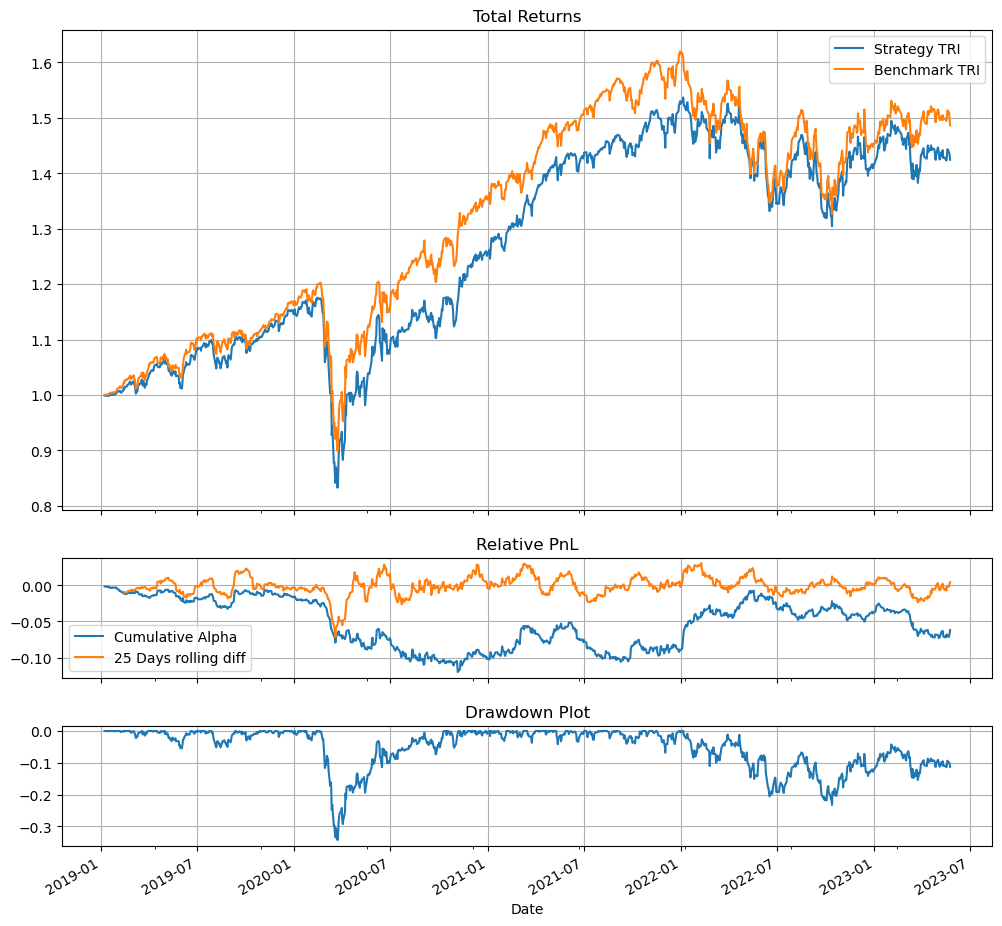

,Strategy,Benchmark
Expected Period Return,0.000370,0.000403
Ann. Sharpe,0.600534,0.685651
Ann. Sortino,0.830008,0.950970
Max DD.,-0.342775,-0.303773
CAGR,0.084176,0.094767
Avg. Daily Turnover,0.023907,NaN


In [18]:
ori_data = overall_train_test(data)
ori_data.report()

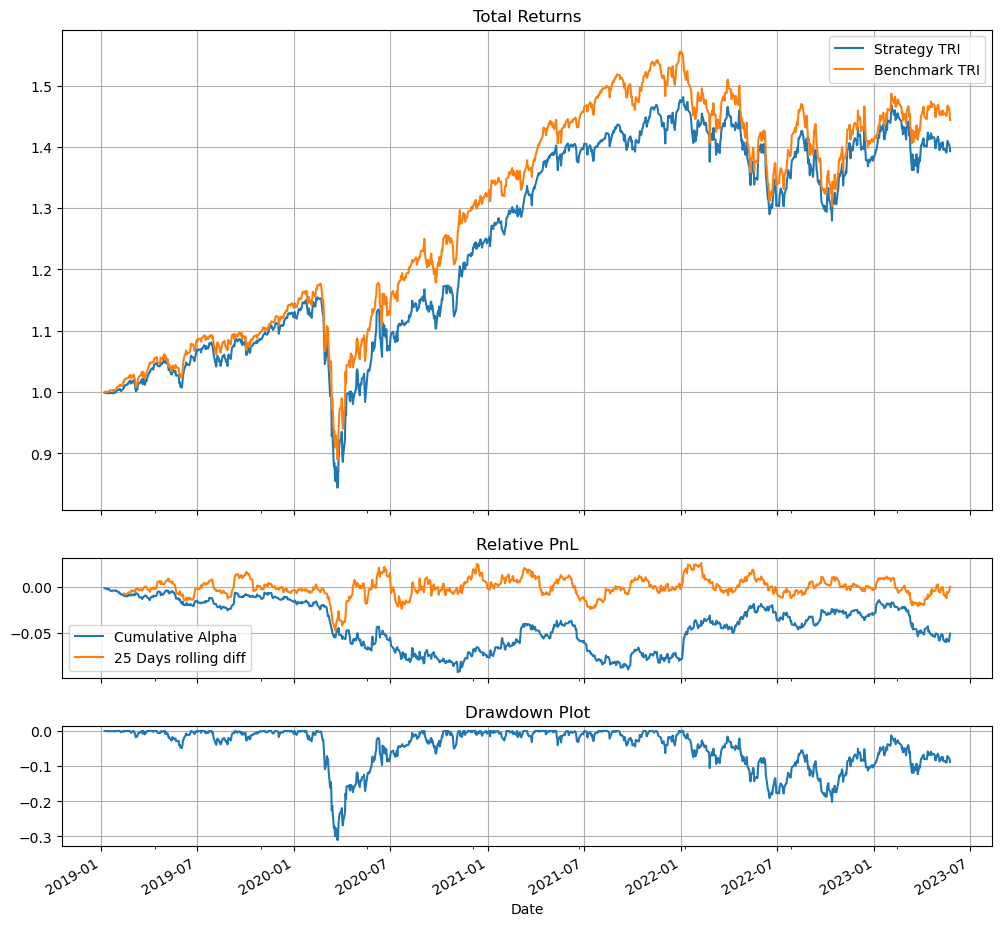

,Strategy,Benchmark
Expected Period Return,0.000343,0.000372
Ann. Sharpe,0.598638,0.671871
Ann. Sortino,0.825518,0.929839
Max DD.,-0.310513,-0.287205
CAGR,0.078667,0.087529
Avg. Daily Turnover,0.021443,NaN


In [19]:
tuned_method = overall_train_test(tuned_data)
tuned_method.report()

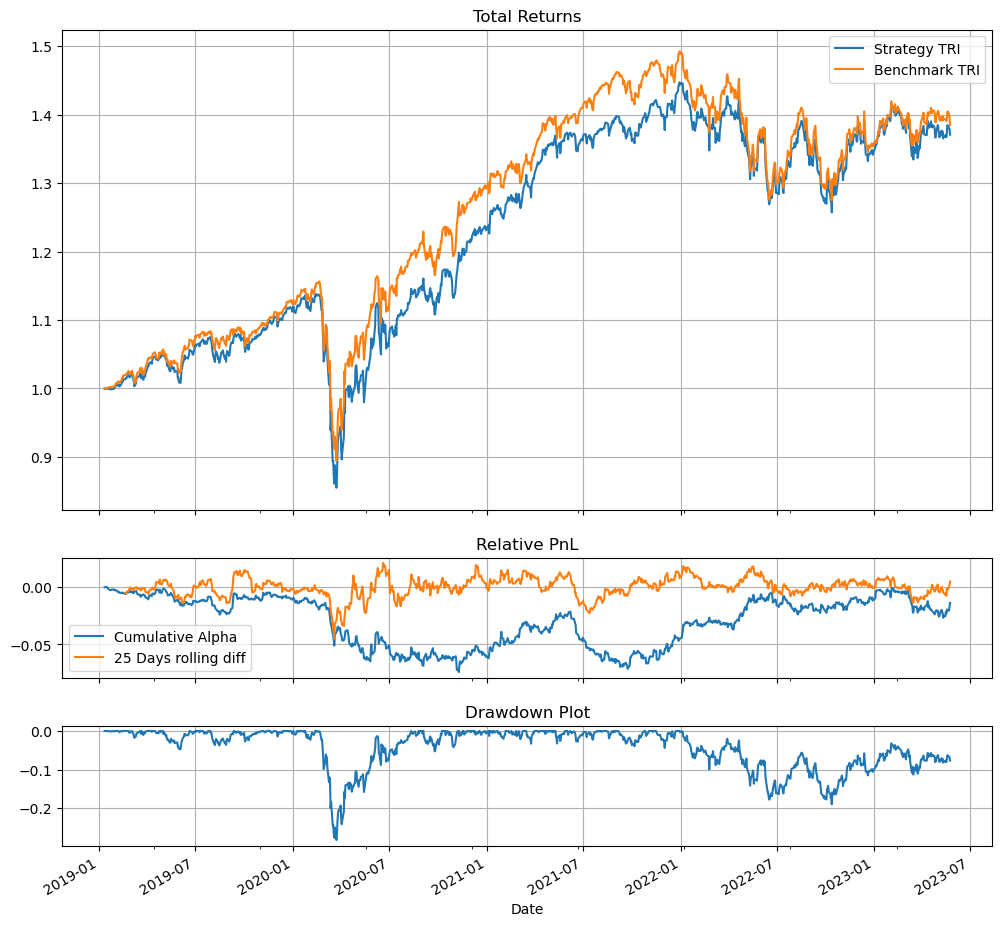

,Strategy,Benchmark
Expected Period Return,0.000322,0.000328
Ann. Sharpe,0.612116,0.653672
Ann. Sortino,0.847516,0.902838
Max DD.,-0.282884,-0.262082
CAGR,0.074871,0.077378
Avg. Daily Turnover,0.019016,NaN


In [20]:
tuned_method2 = overall_train_test(tuned_data2)
tuned_method2.report()

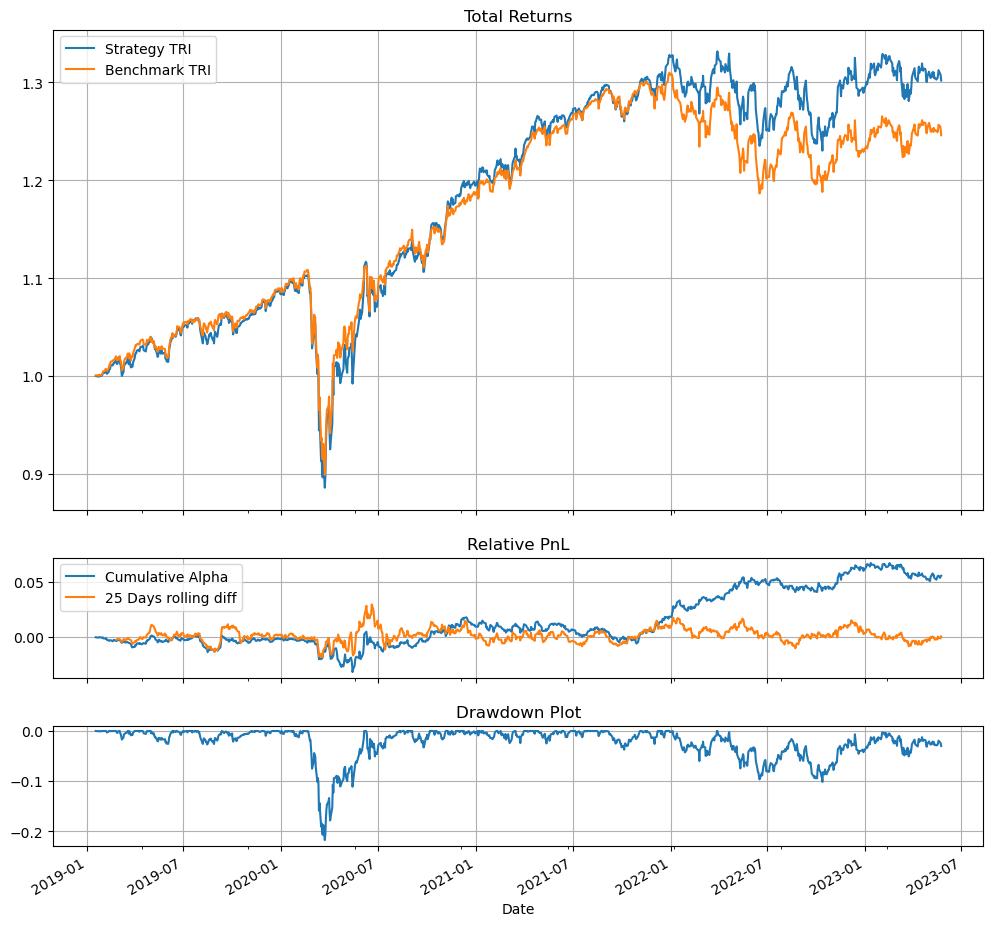

,Strategy,Benchmark
Expected Period Return,0.000262,0.000218
Ann. Sharpe,0.649860,0.590384
Ann. Sortino,0.899851,0.807630
Max DD.,-0.217426,-0.209421
CAGR,0.062596,0.051924
Avg. Daily Turnover,0.013912,NaN


In [21]:
tuned_method3 = overall_train_test(tuned_data3)
tuned_method3.report()

In [22]:
ori_method2 = rolling_method(data)
tuned1_method2 = rolling_method(tuned_data)
tuned2_method2 = rolling_method(tuned_data2)
tuned3_method2 = rolling_method(tuned_data3)

In [23]:
ori_method2.mean(level = 1).T

C:\Users\cassi\AppData\Local\Temp\ipykernel_28700\111489667.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  ori_method2.mean(level = 1).T


,Benchmark,Strategy
Ann. Sharpe,1.188379,1.268316
Ann. Sortino,1.777755,1.905126
Avg. Daily Turnover,NaN,0.081280
CAGR,0.103534,0.127022
Expected Period Return,0.000418,0.000518
Max DD.,-0.108219,-0.118388


In [24]:
tuned1_method2.mean(level = 1).T

C:\Users\cassi\AppData\Local\Temp\ipykernel_28700\3966325112.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  tuned1_method2.mean(level = 1).T


,Benchmark,Strategy
Ann. Sharpe,1.204629,1.310867
Ann. Sortino,1.808035,1.988721
Avg. Daily Turnover,NaN,0.081736
CAGR,0.101007,0.141873
Expected Period Return,0.000409,0.000561
Max DD.,-0.102273,-0.107172


In [25]:
tuned2_method2.mean(level = 1).T

C:\Users\cassi\AppData\Local\Temp\ipykernel_28700\4121069542.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  tuned2_method2.mean(level = 1).T


,Benchmark,Strategy
Ann. Sharpe,1.235315,1.334957
Ann. Sortino,1.854984,2.028332
Avg. Daily Turnover,NaN,0.089756
CAGR,0.097109,0.129798
Expected Period Return,0.000394,0.000514
Max DD.,-0.093137,-0.104795


In [26]:
tuned3_method2.mean(level = 1).T

C:\Users\cassi\AppData\Local\Temp\ipykernel_28700\2177127901.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  tuned3_method2.mean(level = 1).T


,Benchmark,Strategy
Ann. Sharpe,1.289131,1.474613
Ann. Sortino,1.952743,2.255788
Avg. Daily Turnover,NaN,0.053877
CAGR,0.083896,0.127632
Expected Period Return,0.000335,0.000498
Max DD.,-0.074873,-0.087258


### Sector groupby

In [27]:
def GICS(data, industry):
    first_stage = pd.DataFrame(data.groupby(["year", industry, "Symbol"]).mean().iloc[ : ,2])
    threshold = 0.05
    direc = []
    for y in first_stage.index.get_level_values(0).unique():
        for i in first_stage.index.get_level_values(1).unique():
            diff = (first_stage.loc[(y, i, slice(None))] - first_stage.loc[(y, i, slice(None))].mean())
            for x in range(len(diff)):
                value = diff.iloc[x].values 
                if value >= 0 and value <= threshold:
                    direc.append(1)
                elif value <= 0 and value >= threshold:
                    direc.append(-1)
                else:
                    direc.append(0)
                    
    first_stage.insert(1, "Direction", direc)
    considered_Stocks = first_stage[first_stage["Direction"] != 0]
    testing = considered_Stocks.groupby(["year", "Symbol"]).sum()
    group_dict = {}
    for i in range(2006,2024):
        group_dict[i] = testing.loc[(i,slice(None))]
    sample = data.copy()
    sample = sample.drop("Direction", axis = 1)
    pos = []
    for i in range(len(sample)):
        current_year = sample["year"][i]
        if current_year == 2006:
            pos.append(0)
        else:
            if sample["Symbol"][i] in group_dict[current_year - 1].index:
                pos.append(group_dict[current_year - 1]["Direction"].loc[sample["Symbol"][i]])
            else:
                pos.append(0)

    sample.insert(2, "Direction", pos)
    return sample

In [28]:
industry_data = GICS(data, "GICS Sector")
group1 = overall_train_test(industry_data)
group2 = rolling_method(industry_data)

In [29]:
sub_data = GICS(data, "GICS Sub-Industry")
group3 = overall_train_test(sub_data)
group4 = rolling_method(sub_data)

In [30]:
def converter(data):
    summary = data.mean(level = 1)[ : : -1].T
    summary = summary.reindex(["Expected Period Return", "Ann. Sharpe", "Ann. Sortino", "Max DD.", "CAGR", "Avg. Daily Turnover"])
    return summary

In [31]:
combined_method1 = pd.concat([pd.Series(ori_data.quick_report().iloc[ : ,1]),\
    pd.Series(tuned_method.quick_report().iloc[ : ,0], name = "25%"), pd.Series(tuned_method2.quick_report().iloc[ : ,0], name = "50%"), pd.Series(tuned_method3.quick_report().iloc[ : ,0], name = "75%"),\
    pd.Series(group1.quick_report().iloc[ : ,0], name = "Sector"), pd.Series(group3.quick_report().iloc[ : ,0], name = "Sub-Industry")], axis = 1)

In [32]:
combined_method1 = combined_method1.T
combined_method1

,Expected Period Return,Ann. Sharpe,Ann. Sortino,Max DD.,CAGR,Avg. Daily Turnover
Benchmark,0.000403,0.685651,0.950970,-0.303773,0.094767,NaN
25%,0.000343,0.598638,0.825518,-0.310513,0.078667,0.021443
50%,0.000322,0.612116,0.847516,-0.282884,0.074871,0.019016
75%,0.000262,0.649860,0.899851,-0.217426,0.062596,0.013912
Sector,0.000370,0.600534,0.830008,-0.342775,0.084176,0.023907
Sub-Industry,0.000362,0.589004,0.813512,-0.341276,0.082084,0.022977


In [33]:
combined_method2 = pd.concat([
    pd.Series(converter(ori_method2).iloc[:, 1]),
    pd.Series(converter(tuned1_method2).iloc[:, 0], name="25%"),
    pd.Series(converter(tuned2_method2).iloc[:, 0], name="50%"),
    pd.Series(converter(tuned3_method2).iloc[:, 0],name="75%"),
    pd.Series(converter(group2).iloc[:, 0], name="Sector"),
    pd.Series(converter(group4).iloc[:, 0], name="Sub-Industry")
], axis=1)


C:\Users\cassi\AppData\Local\Temp\ipykernel_28700\3637936406.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  summary = data.mean(level = 1)[ : : -1].T
C:\Users\cassi\AppData\Local\Temp\ipykernel_28700\3637936406.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  summary = data.mean(level = 1)[ : : -1].T
C:\Users\cassi\AppData\Local\Temp\ipykernel_28700\3637936406.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  summary = data.mean(level = 1)[ : : -1].T
C:\Users\cassi\AppData\Local\Te

In [34]:
combined_method2 = combined_method2.T
combined_method2

,Expected Period Return,Ann. Sharpe,Ann. Sortino,Max DD.,CAGR,Avg. Daily Turnover
Benchmark,0.000418,1.188379,1.777755,-0.108219,0.103534,NaN
25%,0.000561,1.310867,1.988721,-0.107172,0.141873,0.081736
50%,0.000514,1.334957,2.028332,-0.104795,0.129798,0.089756
75%,0.000498,1.474613,2.255788,-0.087258,0.127632,0.053877
Sector,0.000461,1.152762,1.719503,-0.124404,0.113500,0.081712
Sub-Industry,0.000474,1.177431,1.759406,-0.124352,0.115674,0.096496
